/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


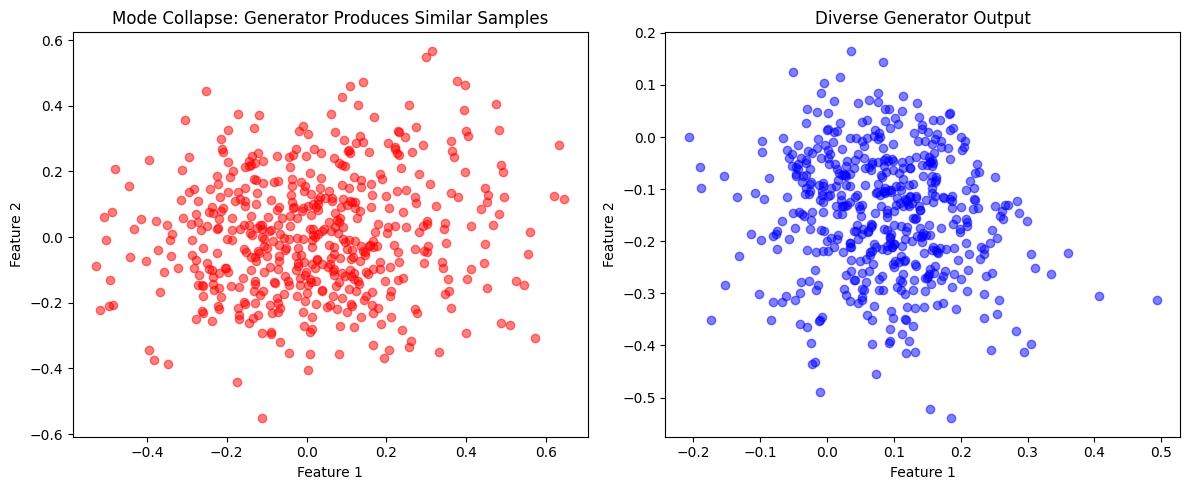

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization

# Simulate Mode Collapse by forcing the generator to learn only a single pattern

# Define a simple generator with Dense layers (likely to cause mode collapse)
def build_collapsed_generator(latent_dim):
    generator = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(128),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(2, activation='tanh')  # Outputting 2D points
    ])
    return generator

# Define a properly functioning generator (for comparison)
def build_diverse_generator(latent_dim):
    generator = Sequential([
        Dense(128, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(256),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),
        Dense(2, activation='tanh')  # Outputting 2D points
    ])
    return generator

# Generate random noise input
latent_dim = 10
num_samples = 500
random_noise = np.random.randn(num_samples, latent_dim)

# Initialize generators
collapsed_generator = build_collapsed_generator(latent_dim)
diverse_generator = build_diverse_generator(latent_dim)

# Generate fake samples from both generators
collapsed_samples = collapsed_generator.predict(random_noise)
diverse_samples = diverse_generator.predict(random_noise)

# Plot results
plt.figure(figsize=(12, 5))

# Mode Collapsed Generator
plt.subplot(1, 2, 1)
plt.scatter(collapsed_samples[:, 0], collapsed_samples[:, 1], color='red', alpha=0.5)
plt.title("Mode Collapse: Generator Produces Similar Samples")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Diverse Generator
plt.subplot(1, 2, 2)
plt.scatter(diverse_samples[:, 0], diverse_samples[:, 1], color='blue', alpha=0.5)
plt.title("Diverse Generator Output")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()
